In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

### Question a 

- Is there evidence to support the claim that cotton content affects the mean tensile strength? Use α = 0.05 (Hint: Complete the ANOVA table and then comment).

In [24]:
data = pd.DataFrame({
    'cotton': [15, 15, 15, 15, 15, 20, 20, 20, 20, 20, 25, 25, 25, 25, 25, 30, 30, 30, 30, 30, 35, 35, 35, 35, 35],
    'observations': [7, 7, 15, 11, 9, 12, 17, 12, 18, 18, 14, 19, 19, 18, 18, 19, 25, 22, 19, 23, 7, 10, 11, 15, 11]
})
data

,cotton,observations
0,15,7
1,15,7
2,15,15
3,15,11
4,15,9
5,20,12
6,20,17
7,20,12
8,20,18
9,20,18


In [25]:
# calculate the grand mean
grand_mean = data['observations'].mean()
print("Grand Mean=",grand_mean)

Grand Mean= 15.04


In [26]:
SST=0
for i in data['observations']:
    SST+=(i-grand_mean)**2
print("Sum of squares Total =",SST)

Sum of squares Total = 636.9600000000002


In [27]:
# calculate the degrees of freedom total (DFT)
dft = data.shape[0] - 1
print("Total Degrees of Freedom =",dft)

Total Degrees of Freedom = 24


In [28]:
# calculate the sum of squares between (SSB) and degrees of freedom between (DFB)
group_means = data.groupby('cotton')['observations'].mean()
group_mean_diff = group_means - grand_mean
ssb = (group_mean_diff ** 2).sum() * 5
dfb = group_means.shape[0] - 1
print("Sum of squares Between =",ssb)
print("Degree of freedom Between =",dfb)

Sum of squares Between = 475.7600000000001
Degree of freedom Between = 4


In [29]:
# calculate the sum of squares within Treatments (SSW) and degrees of freedom within Treatments (DFW)
ssw = ((data['observations'] - data.groupby('cotton')['observations'].transform('mean')) ** 2).sum()
dfw = data.shape[0] - group_means.shape[0]

print("Sum of squares Within Treatments =",ssw)
print("Degree of freedom Within Treatments =",dfw)

Sum of squares Within Treatments = 161.2
Degree of freedom Within Treatments = 20


In [30]:
# calculate the mean square between (MSB) and mean square within treatments (MSW)
msb = ssb / dfb
msw = ssw / dfw

In [31]:
# calculate the F statistic and p-value
F_stat = msb / msw
p_val = stats.f.sf(F_stat, dfb, dfw)

In [33]:
# create the ANOVA table
anova_table = pd.DataFrame({
    'Source of Variation': ['Between Treatments', 'Error (Within Treatments)', 'Total'],
    'Sum of Squares': [ssb, ssw, SST],
    'Degrees of Freedom': [dfb, dfw, dft],
    'Mean Square': [msb, msw, np.nan],
    'F value': [F_stat, np.nan, np.nan],
    'p-value': [p_val, np.nan, np.nan]
})

# set the index to the source column
anova_table.set_index('Source of Variation', inplace=True)

# display the ANOVA table
print(anova_table)

                           Sum of Squares  Degrees of Freedom  Mean Square  \
Source of Variation                                                          
Between Treatments                 475.76                   4       118.94   
Error (Within Treatments)          161.20                  20         8.06   
Total                              636.96                  24          NaN   

                             F value   p-value  
Source of Variation                             
Between Treatments         14.756824  0.000009  
Error (Within Treatments)        NaN       NaN  
Total                            NaN       NaN  


### Comment :

- Since the resultant Fo=14.76 is greater than the F value obtained from the F table for alpha=0.05 v1=4 v2=20 is 2.8661. Also the p value is 0. As resultant Fo is > F value from table we reject Null Hypothesis that cotton % doesnot affect tensile strength.

- Thus we accept the alternate Hypothesis and can say that Percentage of cotton in fibre appears to have an effect on tensile strength.

### Question b

- Analyze the residuals from this experiment and comment on model adequacy. (The plot must have the x-axis as Residuals and the y-axis as Normal Score, in BLUE colour).

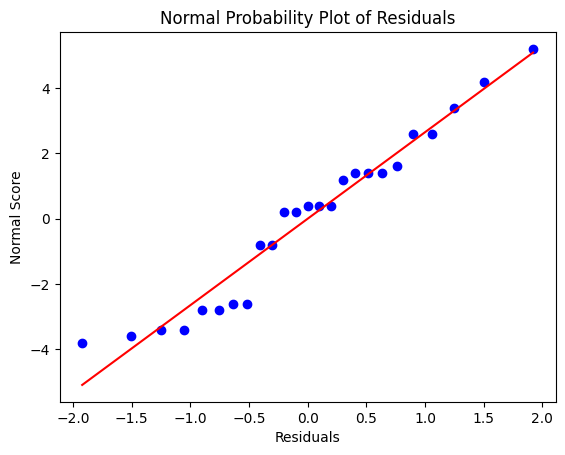

In [36]:
# calculate the residuals
data['residuals'] = data['observations'] - data.groupby('cotton')['observations'].transform('mean')

# create a normal probability plot
stats.probplot(data['residuals'], plot=plt)

# set the title and labels
plt.title('Normal Probability Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Normal Score')

# show the plot
plt.show()

### Comments :

- Based on the plot, we can see that the residuals appear to be roughly normally distributed, with a few outliers at the extremes. Therefore, the model appears to be adequate for analyzing the effect of cotton content on tensile strength.